Usage of tsfresh to extract some features

https://tsfresh.readthedocs.io/en/latest/

1. Data

Se copiaron datos registrados con ingest por el datacube en la máquina de ixchel hacia:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`

de sentinel:

`s2_l2a_10m_scl_s3_39_-30*.nc`

No se usa la funcionalidad del datacube (gridworkflow load) pues se requiere que estén en la ruta:

`/shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/`

pero el `shared_volume` es de `LUSTRE` y no de la máquina de Ixchel... se prefiere no tener los datos en la ruta de la línea anterior y mejor usar la de `tasks`... al final el load no importa para la creación de las series de tiempo...



In [1]:
%matplotlib inline
import matplotlib
from madmex.wrappers import gwf_query
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
from madmex.util.xarray import to_float, to_int
from datacube.api import GridWorkflow
import glob

Feature Extraction:  10%|#         | 5/50 [19:46<3:09:37, 252.82s/it]
Exception in thread Thread-27:
2019-11-11 20:18:56,971 - madmex.wrappers - loggerwriter write: Exception in thread Thread-27:
Traceback (most recent call last):
2019-11-11 20:18:57,176 - madmex.wrappers - loggerwriter write: Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
2019-11-11 20:18:57,311 - madmex.wrappers - loggerwriter write:   File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
2019-11-11 20:18:57,426 - madmex.wrappers - loggerwriter write:     self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
2019-11-11 20:18:57,560 - madmex.wrappers - loggerwriter write:   File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
2019-11-11 20:18:57,675 - madmex.wrappers - loggerwriter write:     self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/mul

In [2]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

In [3]:
sr_0_no_chunks = xr.open_mfdataset(path +'/s2_l2a_10m_scl_s3_39_-30*.nc',
                                  data_vars='minimal', coords='minimal',
                                  combine='by_coords')

In [4]:
sr_0_no_chunks

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3
    h

In [5]:
sr_0_no_chunks.time

<xarray.DataArray 'time' (time: 10)>
array(['2019-01-07T17:18:02.000000000', '2019-02-06T17:18:04.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.000000000',
       '2019-02-26T17:18:11.000000000', '2019-03-08T17:18:02.000000000',
       '2019-03-28T17:18:07.000000000', '2019-04-04T17:08:13.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [6]:
sr_0 = sr_0_no_chunks.chunk({'time': -1})

In [7]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3

In [8]:
sr_0['ndvi'] = ((sr_0.nir-sr_0.red)/(sr_0.nir+sr_0.red))

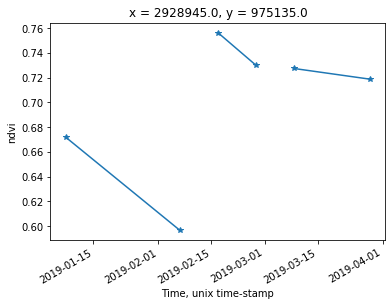

In [9]:
sr_0.ndvi[:,100,100].plot(marker="*")

In [9]:
begin="2019-01-1"

In [10]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [11]:
ts_1 = sr_0.ndvi.resample(time='10D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_0['time'][0].values.astype(datetime)*1e-9)).nearest().interpolate_na('time')

In [12]:
ts_1

<xarray.DataArray 'ndvi' (time: 9, y: 5002, x: 5002)>
dask.array<transpose, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 5002, 5002), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-11 ... 2019-03-22
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [13]:
ts_1['time']

<xarray.DataArray 'time' (time: 9)>
array(['2019-01-01T00:00:00.000000000', '2019-01-11T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-03-02T00:00:00.000000000', '2019-03-12T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-11 ... 2019-03-22
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [14]:
times=np.datetime_as_string(ts_1['time'],unit='D')

In [15]:
times

array(['2019-01-01', '2019-01-11', '2019-01-21', '2019-01-31',
       '2019-02-10', '2019-02-20', '2019-03-02', '2019-03-12',
       '2019-03-22'], dtype='<U28')

In [16]:
ts_1_times_clean = ts_1.assign_coords({'time':times})

In [17]:
ts_1_times_clean

<xarray.DataArray 'ndvi' (time: 9, y: 5002, x: 5002)>
dask.array<transpose, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 5002, 5002), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U28 '2019-01-01' '2019-01-11' ... '2019-03-12' '2019-03-22'
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [ ]:
#ts_1[:,100,100].plot(marker="*")

In [18]:
dframe_ts_1 = ts_1_times_clean.to_dataframe()

In [20]:
dframe_ts_1

ndvi
time       y        x                  
2019-01-01 976135.0 2927945.0  0.517528
                    2927955.0  0.472230
                    2927965.0  0.490831
                    2927975.0  0.490698
                    2927985.0  0.564103
                    2927995.0  0.646668
                    2928005.0  0.628898
                    2928015.0  0.541189
                    2928025.0  0.525950
                    2928035.0  0.547509
                    2928045.0  0.548800
                    2928055.0  0.616078
                    2928065.0  0.628468
                    2928075.0  0.667764
                    2928085.0  0.715376
                    2928095.0  0.665098
                    2928105.0  0.684670
                    2928115.0  0.618281
                    2928125.0  0.541678
                    2928135.0  0.618703
                    2928145.0  0.730065
                    2928155.0  0.745506
                    2928165.0  0.686247
                    2928175.0  0.539791
                    2928185.0  0.626696
                    2928195.0  0.688626
                    2928205.0  0.720943
                    2928215.0  0.738617
                    2928225.0  0.752389
                    2928235.0  0.759179
...                                 ...
2019-03-22 926125.0 2977665.0       NaN
                    2977675.0       NaN
                    2977685.0       NaN
                    2977695.0       NaN
                    2977705.0       NaN
                    2977715.0       NaN
                    2977725.0       NaN
                    2977735.0       NaN
                    2977745.0       NaN
                    2977755.0       NaN
                    2977765.0       NaN
                    2977775.0       NaN
                    2977785.0       NaN
                    2977795.0       NaN
                    2977805.0       NaN
                    2977815.0       NaN
                    2977825.0       NaN
                    2977835.0       NaN
                    2977845.0       NaN
                    2977855.0       NaN
                    2977865.0       NaN
                    2977875.0       NaN
                    2977885.0       NaN
                    2977895.0       NaN
                    2977905.0       NaN
                    2977915.0       NaN
                    2977925.0       NaN
                    2977935.0       NaN
                    2977945.0       NaN
                    2977955.0       NaN

[225180036 rows x 1 columns]

In [21]:
dframe_ts_1 = dframe_ts_1.dropna()

In [22]:
dframe_ts_1

ndvi
time       y        x                  
2019-01-01 976135.0 2927945.0  0.517528
                    2927955.0  0.472230
                    2927965.0  0.490831
                    2927975.0  0.490698
                    2927985.0  0.564103
                    2927995.0  0.646668
                    2928005.0  0.628898
                    2928015.0  0.541189
                    2928025.0  0.525950
                    2928035.0  0.547509
                    2928045.0  0.548800
                    2928055.0  0.616078
                    2928065.0  0.628468
                    2928075.0  0.667764
                    2928085.0  0.715376
                    2928095.0  0.665098
                    2928105.0  0.684670
                    2928115.0  0.618281
                    2928125.0  0.541678
                    2928135.0  0.618703
                    2928145.0  0.730065
                    2928155.0  0.745506
                    2928165.0  0.686247
                    2928175.0  0.539791
                    2928185.0  0.626696
                    2928195.0  0.688626
                    2928205.0  0.720943
                    2928215.0  0.738617
                    2928225.0  0.752389
                    2928235.0  0.759179
...                                 ...
2019-03-22 926125.0 2975405.0  0.692157
                    2975415.0  0.724205
                    2975425.0  0.687607
                    2975435.0  0.554862
                    2975445.0  0.497674
                    2975455.0  0.472318
                    2975465.0  0.440896
                    2975475.0  0.479583
                    2975485.0  0.505138
                    2975495.0  0.473620
                    2975505.0  0.622590
                    2975515.0  0.659013
                    2975525.0  0.650363
                    2975535.0  0.704445
                    2975545.0  0.732305
                    2975555.0  0.727012
                    2975565.0  0.720704
                    2975575.0  0.716977
                    2975585.0  0.694337
                    2975595.0  0.703485
                    2975605.0  0.678998
                    2975615.0  0.630653
                    2975625.0  0.629344
                    2975635.0  0.609916
                    2975645.0  0.574764
                    2975655.0  0.588850
                    2975665.0  0.572321
                    2975675.0  0.543935
                    2975685.0  0.502041
                    2975695.0  0.516384

[223889561 rows x 1 columns]

In [23]:
dframe_ts_1=dframe_ts_1.reset_index('time')

In [24]:
dframe_ts_1

time      ndvi
y        x                              
976135.0 2927945.0  2019-01-01  0.517528
         2927955.0  2019-01-01  0.472230
         2927965.0  2019-01-01  0.490831
         2927975.0  2019-01-01  0.490698
         2927985.0  2019-01-01  0.564103
         2927995.0  2019-01-01  0.646668
         2928005.0  2019-01-01  0.628898
         2928015.0  2019-01-01  0.541189
         2928025.0  2019-01-01  0.525950
         2928035.0  2019-01-01  0.547509
         2928045.0  2019-01-01  0.548800
         2928055.0  2019-01-01  0.616078
         2928065.0  2019-01-01  0.628468
         2928075.0  2019-01-01  0.667764
         2928085.0  2019-01-01  0.715376
         2928095.0  2019-01-01  0.665098
         2928105.0  2019-01-01  0.684670
         2928115.0  2019-01-01  0.618281
         2928125.0  2019-01-01  0.541678
         2928135.0  2019-01-01  0.618703
         2928145.0  2019-01-01  0.730065
         2928155.0  2019-01-01  0.745506
         2928165.0  2019-01-01  0.686247
         2928175.0  2019-01-01  0.539791
         2928185.0  2019-01-01  0.626696
         2928195.0  2019-01-01  0.688626
         2928205.0  2019-01-01  0.720943
         2928215.0  2019-01-01  0.738617
         2928225.0  2019-01-01  0.752389
         2928235.0  2019-01-01  0.759179
...                        ...       ...
926125.0 2975405.0  2019-03-22  0.692157
         2975415.0  2019-03-22  0.724205
         2975425.0  2019-03-22  0.687607
         2975435.0  2019-03-22  0.554862
         2975445.0  2019-03-22  0.497674
         2975455.0  2019-03-22  0.472318
         2975465.0  2019-03-22  0.440896
         2975475.0  2019-03-22  0.479583
         2975485.0  2019-03-22  0.505138
         2975495.0  2019-03-22  0.473620
         2975505.0  2019-03-22  0.622590
         2975515.0  2019-03-22  0.659013
         2975525.0  2019-03-22  0.650363
         2975535.0  2019-03-22  0.704445
         2975545.0  2019-03-22  0.732305
         2975555.0  2019-03-22  0.727012
         2975565.0  2019-03-22  0.720704
         2975575.0  2019-03-22  0.716977
         2975585.0  2019-03-22  0.694337
         2975595.0  2019-03-22  0.703485
         2975605.0  2019-03-22  0.678998
         2975615.0  2019-03-22  0.630653
         2975625.0  2019-03-22  0.629344
         2975635.0  2019-03-22  0.609916
         2975645.0  2019-03-22  0.574764
         2975655.0  2019-03-22  0.588850
         2975665.0  2019-03-22  0.572321
         2975675.0  2019-03-22  0.543935
         2975685.0  2019-03-22  0.502041
         2975695.0  2019-03-22  0.516384

[223889561 rows x 2 columns]

In [25]:
dframe_ts_1.index = [dframe_ts_1.index.get_level_values('y'),dframe_ts_1.index.get_level_values('x'),
                     dframe_ts_1.index.map('{0[0]}/{0[1]}'.format)]

In [27]:
dframe_ts_1.index.names = ['y', 'x','y/x']

In [28]:
dframe_ts_1

time      ndvi
y        x         y/x                                     
976135.0 2927945.0 976135.0/2927945.0  2019-01-01  0.517528
         2927955.0 976135.0/2927955.0  2019-01-01  0.472230
         2927965.0 976135.0/2927965.0  2019-01-01  0.490831
         2927975.0 976135.0/2927975.0  2019-01-01  0.490698
         2927985.0 976135.0/2927985.0  2019-01-01  0.564103
         2927995.0 976135.0/2927995.0  2019-01-01  0.646668
         2928005.0 976135.0/2928005.0  2019-01-01  0.628898
         2928015.0 976135.0/2928015.0  2019-01-01  0.541189
         2928025.0 976135.0/2928025.0  2019-01-01  0.525950
         2928035.0 976135.0/2928035.0  2019-01-01  0.547509
         2928045.0 976135.0/2928045.0  2019-01-01  0.548800
         2928055.0 976135.0/2928055.0  2019-01-01  0.616078
         2928065.0 976135.0/2928065.0  2019-01-01  0.628468
         2928075.0 976135.0/2928075.0  2019-01-01  0.667764
         2928085.0 976135.0/2928085.0  2019-01-01  0.715376
         2928095.0 976135.0/2928095.0  2019-01-01  0.665098
         2928105.0 976135.0/2928105.0  2019-01-01  0.684670
         2928115.0 976135.0/2928115.0  2019-01-01  0.618281
         2928125.0 976135.0/2928125.0  2019-01-01  0.541678
         2928135.0 976135.0/2928135.0  2019-01-01  0.618703
         2928145.0 976135.0/2928145.0  2019-01-01  0.730065
         2928155.0 976135.0/2928155.0  2019-01-01  0.745506
         2928165.0 976135.0/2928165.0  2019-01-01  0.686247
         2928175.0 976135.0/2928175.0  2019-01-01  0.539791
         2928185.0 976135.0/2928185.0  2019-01-01  0.626696
         2928195.0 976135.0/2928195.0  2019-01-01  0.688626
         2928205.0 976135.0/2928205.0  2019-01-01  0.720943
         2928215.0 976135.0/2928215.0  2019-01-01  0.738617
         2928225.0 976135.0/2928225.0  2019-01-01  0.752389
         2928235.0 976135.0/2928235.0  2019-01-01  0.759179
...                                           ...       ...
926125.0 2975405.0 926125.0/2975405.0  2019-03-22  0.692157
         2975415.0 926125.0/2975415.0  2019-03-22  0.724205
         2975425.0 926125.0/2975425.0  2019-03-22  0.687607
         2975435.0 926125.0/2975435.0  2019-03-22  0.554862
         2975445.0 926125.0/2975445.0  2019-03-22  0.497674
         2975455.0 926125.0/2975455.0  2019-03-22  0.472318
         2975465.0 926125.0/2975465.0  2019-03-22  0.440896
         2975475.0 926125.0/2975475.0  2019-03-22  0.479583
         2975485.0 926125.0/2975485.0  2019-03-22  0.505138
         2975495.0 926125.0/2975495.0  2019-03-22  0.473620
         2975505.0 926125.0/2975505.0  2019-03-22  0.622590
         2975515.0 926125.0/2975515.0  2019-03-22  0.659013
         2975525.0 926125.0/2975525.0  2019-03-22  0.650363
         2975535.0 926125.0/2975535.0  2019-03-22  0.704445
         2975545.0 926125.0/2975545.0  2019-03-22  0.732305
         2975555.0 926125.0/2975555.0  2019-03-22  0.727012
         2975565.0 926125.0/2975565.0  2019-03-22  0.720704
         2975575.0 926125.0/2975575.0  2019-03-22  0.716977
         2975585.0 926125.0/2975585.0  2019-03-22  0.694337
         2975595.0 926125.0/2975595.0  2019-03-22  0.703485
         2975605.0 926125.0/2975605.0  2019-03-22  0.678998
         2975615.0 926125.0/2975615.0  2019-03-22  0.630653
         2975625.0 926125.0/2975625.0  2019-03-22  0.629344
         2975635.0 926125.0/2975635.0  2019-03-22  0.609916
         2975645.0 926125.0/2975645.0  2019-03-22  0.574764
         2975655.0 926125.0/2975655.0  2019-03-22  0.588850
         2975665.0 926125.0/2975665.0  2019-03-22  0.572321
         2975675.0 926125.0/2975675.0  2019-03-22  0.543935
         2975685.0 926125.0/2975685.0  2019-03-22  0.502041
         2975695.0 926125.0/2975695.0  2019-03-22  0.516384

[223889561 rows x 2 columns]

In [29]:
dframe_ts_1=dframe_ts_1.reset_index('y/x')

In [30]:
dframe_ts_1

y/x        time      ndvi
y        x                                                  
976135.0 2927945.0  976135.0/2927945.0  2019-01-01  0.517528
         2927955.0  976135.0/2927955.0  2019-01-01  0.472230
         2927965.0  976135.0/2927965.0  2019-01-01  0.490831
         2927975.0  976135.0/2927975.0  2019-01-01  0.490698
         2927985.0  976135.0/2927985.0  2019-01-01  0.564103
         2927995.0  976135.0/2927995.0  2019-01-01  0.646668
         2928005.0  976135.0/2928005.0  2019-01-01  0.628898
         2928015.0  976135.0/2928015.0  2019-01-01  0.541189
         2928025.0  976135.0/2928025.0  2019-01-01  0.525950
         2928035.0  976135.0/2928035.0  2019-01-01  0.547509
         2928045.0  976135.0/2928045.0  2019-01-01  0.548800
         2928055.0  976135.0/2928055.0  2019-01-01  0.616078
         2928065.0  976135.0/2928065.0  2019-01-01  0.628468
         2928075.0  976135.0/2928075.0  2019-01-01  0.667764
         2928085.0  976135.0/2928085.0  2019-01-01  0.715376
         2928095.0  976135.0/2928095.0  2019-01-01  0.665098
         2928105.0  976135.0/2928105.0  2019-01-01  0.684670
         2928115.0  976135.0/2928115.0  2019-01-01  0.618281
         2928125.0  976135.0/2928125.0  2019-01-01  0.541678
         2928135.0  976135.0/2928135.0  2019-01-01  0.618703
         2928145.0  976135.0/2928145.0  2019-01-01  0.730065
         2928155.0  976135.0/2928155.0  2019-01-01  0.745506
         2928165.0  976135.0/2928165.0  2019-01-01  0.686247
         2928175.0  976135.0/2928175.0  2019-01-01  0.539791
         2928185.0  976135.0/2928185.0  2019-01-01  0.626696
         2928195.0  976135.0/2928195.0  2019-01-01  0.688626
         2928205.0  976135.0/2928205.0  2019-01-01  0.720943
         2928215.0  976135.0/2928215.0  2019-01-01  0.738617
         2928225.0  976135.0/2928225.0  2019-01-01  0.752389
         2928235.0  976135.0/2928235.0  2019-01-01  0.759179
...                                ...         ...       ...
926125.0 2975405.0  926125.0/2975405.0  2019-03-22  0.692157
         2975415.0  926125.0/2975415.0  2019-03-22  0.724205
         2975425.0  926125.0/2975425.0  2019-03-22  0.687607
         2975435.0  926125.0/2975435.0  2019-03-22  0.554862
         2975445.0  926125.0/2975445.0  2019-03-22  0.497674
         2975455.0  926125.0/2975455.0  2019-03-22  0.472318
         2975465.0  926125.0/2975465.0  2019-03-22  0.440896
         2975475.0  926125.0/2975475.0  2019-03-22  0.479583
         2975485.0  926125.0/2975485.0  2019-03-22  0.505138
         2975495.0  926125.0/2975495.0  2019-03-22  0.473620
         2975505.0  926125.0/2975505.0  2019-03-22  0.622590
         2975515.0  926125.0/2975515.0  2019-03-22  0.659013
         2975525.0  926125.0/2975525.0  2019-03-22  0.650363
         2975535.0  926125.0/2975535.0  2019-03-22  0.704445
         2975545.0  926125.0/2975545.0  2019-03-22  0.732305
         2975555.0  926125.0/2975555.0  2019-03-22  0.727012
         2975565.0  926125.0/2975565.0  2019-03-22  0.720704
         2975575.0  926125.0/2975575.0  2019-03-22  0.716977
         2975585.0  926125.0/2975585.0  2019-03-22  0.694337
         2975595.0  926125.0/2975595.0  2019-03-22  0.703485
         2975605.0  926125.0/2975605.0  2019-03-22  0.678998
         2975615.0  926125.0/2975615.0  2019-03-22  0.630653
         2975625.0  926125.0/2975625.0  2019-03-22  0.629344
         2975635.0  926125.0/2975635.0  2019-03-22  0.609916
         2975645.0  926125.0/2975645.0  2019-03-22  0.574764
         2975655.0  926125.0/2975655.0  2019-03-22  0.588850
         2975665.0  926125.0/2975665.0  2019-03-22  0.572321
         2975675.0  926125.0/2975675.0  2019-03-22  0.543935
         2975685.0  926125.0/2975685.0  2019-03-22  0.502041
         2975695.0  926125.0/2975695.0  2019-03-22  0.516384

[223889561 rows x 3 columns]

# 3 Compute features

In [31]:
from tsfresh.feature_extraction import extract_features, MinimalFCParameters

In [ ]:
extracted_features = extract_features(dframe_ts_1, column_id="y/x", column_sort="time",
                                      default_fc_parameters=MinimalFCParameters())

# Falta incorporar la máscara en la variable pixel_qa en el procedimiento anterior

La aplicación de la máscara en la variable pixel_qa resulta en valores nan